In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import math as mt
import scipy.special
plt.style.use('fivethirtyeight')

# <font face="gotham" color="orange"> Markov Chain Monte Carlo </font>

The **Markov Chain Monte Carlo** (**MCMC**) is a class of algorithm to simulate a distribution that has no closed-form expression. To illustrate the mechanism of MCMC, we resort to the example of Gamma-Poisson conjugate.

Though it has a closed-form expression of posterior, we can still simulate the posterior for demonstrative purpose.

To use MCMC, commonly the Bayes' Theorem is modified without affecting the final result.
$$
P(\lambda \mid y) \propto P(y \mid \lambda)  P(\lambda)
$$
where $\propto$ means proportional to, the integration in the denominator can be safely omitted since it is a constant.

Here we recap the example of hurricanes in the last chapter. The prior elicitation uses


$$
E(\lambda) = \frac{\alpha}{\beta}\\
\text{Var}(\lambda) = \frac{\alpha}{\beta^2}
$$

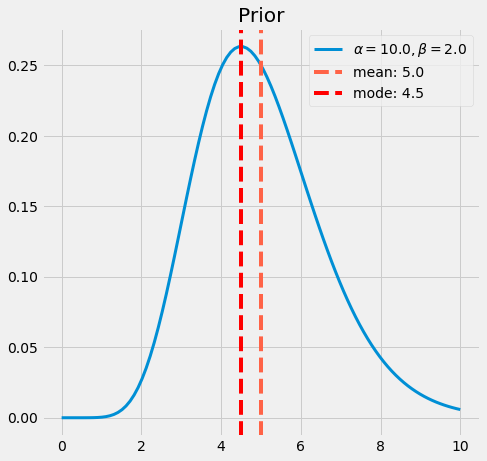

In [2]:
x = np.linspace(0, 10, 100)
params = [10, 2]
gamma_pdf = sp.stats.gamma.pdf(x, a=params[0], scale=1/params[1])

fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x, gamma_pdf, lw = 3, label = r'$\alpha = %.1f, \beta =  %.1f$' % (params[0], params[1]))
ax.set_title('Prior')
mean = params[0]/params[1]
mode = (params[0]-1)/params[1]
ax.axvline(mean, color = 'tomato', ls='--', label='mean: {}'.format(mean))
ax.axvline(mode, color = 'red', ls='--', label='mode: {}'.format(mode))
ax.legend()
plt.show()

1. Because posterior will also be Gamma distribution, we start from proposing a value drawn from posterior
$$
\lambda = 8
$$
This is an arbitrary value, it is called the **initial value**. 

2. Calculate the likelihood of observing $k=3$ hurricanes given $\lambda=8$.
$$
\mathcal{L}(3 ; 8)=\frac{\lambda^{k} e^{-\lambda}}{k !}=\frac{8^{3} e^{-8}}{3 !}=0.1075
$$

In [3]:
def pois_lh(k, lamda):
    lh = lamda**k*np.exp(-lamda)/mt.factorial(k)
    return lh

In [4]:
pois_lh(3, 8)

0.02862614424768101

3. Calculate prior 
$$
g(\lambda ; \alpha, \beta)=\frac{\beta^{\alpha} \lambda^{\alpha-1} e^{-\beta \lambda}}{\Gamma(\alpha)}
$$

In [5]:
def gamma_prior(alpha, beta, lamda):
    prior = (beta**alpha*lamda**(alpha-1)*np.exp(-beta*lamda))/sp.special.gamma(alpha)
    return prior

In [7]:
gamma_prior(alpha=10, beta=2, lamda=8)

0.0426221247856141